In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn import  tree
from sklearn.tree import DecisionTreeRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingRegressor

import warnings
warnings.filterwarnings("ignore")

In [165]:
df=pd.read_csv('DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [149]:
df.shape

(14204, 12)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [151]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,834.247400
50%,12.600000,0.062347,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [152]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [153]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [154]:
df.groupby("Item_Type", group_keys=True).apply(lambda x: x)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.064709,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN


In [155]:
df1 = df.groupby('Item_Type').Item_Outlet_Sales.mean()
df1

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

# Missing Values treatment

In [156]:
df.groupby("Item_Type").mean()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Type,,,,,
Baking Goods,12.273416,0.073074,127.458237,1997.825967,1952.971207
Breads,11.180505,0.073498,141.389849,1997.754808,2204.132226
Breakfast,13.208737,0.085882,137.985444,1997.666667,2111.808651
Canned,12.338907,0.071727,138.620936,1997.854244,2225.194904
Dairy,13.221959,0.075403,147.230998,1997.853873,2232.542597
Frozen Foods,12.570056,0.071720,136.467385,1997.767181,2132.867744
Fruits and Vegetables,13.199893,0.073110,144.304237,1997.806756,2289.009592
Hard Drinks,11.608646,0.070340,137.295031,1997.953039,2139.221622
Health and Hygiene,13.126334,0.060995,133.108079,1997.785548,2010.000265


In [24]:
df1=df.groupby("Item_Type").transform(lambda x: x.fillna(x.median()))
df1

C:\Users\Sumit\AppData\Local\Temp\ipykernel_2460\440235415.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df1=df.groupby("Item_Type").transform(lambda x: x.fillna(x.mean()))
C:\Users\Sumit\AppData\Local\Temp\ipykernel_2460\440235415.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df1=df.groupby("Item_Type").transform(lambda x: x.fillna(x.mean()))
C:\Users\Sumit\AppData\Local\Temp\ipykernel_2460\440235415.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.138000
1,5.92,0.019278,48.2692,2009,443.422800
2,17.50,0.016760,141.6180,1999,2097.270000
3,19.20,0.074402,182.0950,1998,732.380000
4,8.93,0.064299,53.8614,1987,994.705200
...,...,...,...,...,...
14199,10.50,0.013496,141.3154,1997,2277.321739
14200,7.60,0.142991,169.1448,2009,2374.332773
14201,10.00,0.073529,118.7440,2002,2010.000265
14202,15.30,0.064709,214.6218,2007,2225.194904


In [30]:
df2=df.groupby("Item_Type").transform(lambda x: x.fillna(x.median()))
df2

C:\Users\Sumit\AppData\Local\Temp\ipykernel_2460\836146857.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df2=df.groupby("Item_Type").transform(lambda x: x.fillna(x.median()))
C:\Users\Sumit\AppData\Local\Temp\ipykernel_2460\836146857.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df2=df.groupby("Item_Type").transform(lambda x: x.fillna(x.median()))
C:\Users\Sumit\AppData\Local\Temp\ipykernel_2460\836146857.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.074402,182.0950,1998,732.3800
4,8.93,0.064299,53.8614,1987,994.7052
...,...,...,...,...,...
14199,10.50,0.013496,141.3154,1997,1944.1360
14200,7.60,0.142991,169.1448,2009,1968.1048
14201,10.00,0.073529,118.7440,2002,1669.4935
14202,15.30,0.064709,214.6218,2007,1860.2452


In [25]:
df1.isnull().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

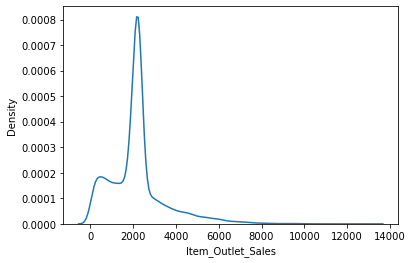

In [34]:
sns.distplot(df1['Item_Outlet_Sales'],hist=False);#fill with mean

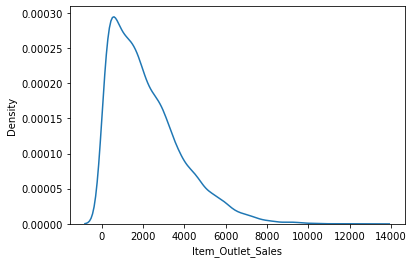

In [33]:
sns.distplot(df['Item_Outlet_Sales'],hist=False);#orignal

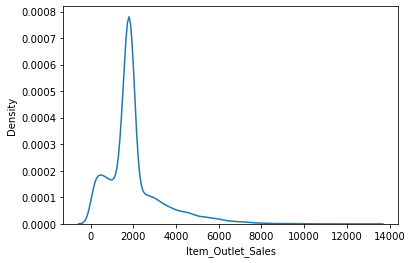

In [35]:
sns.distplot(df2['Item_Outlet_Sales'],hist=False);#median

In [ ]:
plt.figure(figsize=(12,8),facecolor='moccasin')
plt.title('Interest level contain overall price ')
df.groupby('interest_level')['price'].sum().plot(kind='pie',autopct='%.2f%%',explode=(0.0,0.1,0.1));

In [27]:
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.138000
1,5.92,0.019278,48.2692,2009,443.422800
2,17.50,0.016760,141.6180,1999,2097.270000
3,19.20,0.074402,182.0950,1998,732.380000
4,8.93,0.064299,53.8614,1987,994.705200
...,...,...,...,...,...
14199,10.50,0.013496,141.3154,1997,2277.321739
14200,7.60,0.142991,169.1448,2009,2374.332773
14201,10.00,0.073529,118.7440,2002,2010.000265
14202,15.30,0.064709,214.6218,2007,2225.194904


In [166]:
df3=df.dropna()
df3.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


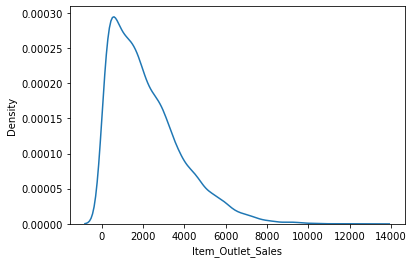

In [38]:
sns.distplot(df3['Item_Outlet_Sales'],hist=False);#median

In [42]:
def seprate_data_types(df):
    categorical = []
    continuous = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() <100:       # nunique:  returns unique values in the column,
                                                    #here 43 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            continuous.append(column)
            
    return categorical, continuous 


categorical, continuous = seprate_data_types(df3)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, continuous]
print(tabulate({"Categorical":categorical,
                "Continuous": continuous}, headers = ["categorical", "continuous"]))

categorical                continuous
-------------------------  -----------------
Item_Fat_Content           Item_Identifier
Item_Type                  Item_Weight
Outlet_Identifier          Item_Visibility
Outlet_Establishment_Year  Item_MRP
Outlet_Size                Item_Outlet_Sales
Outlet_Location_Type
Outlet_Type


# EDA

Text(0.5, 1.0, 'Item_Outlet_Sales')

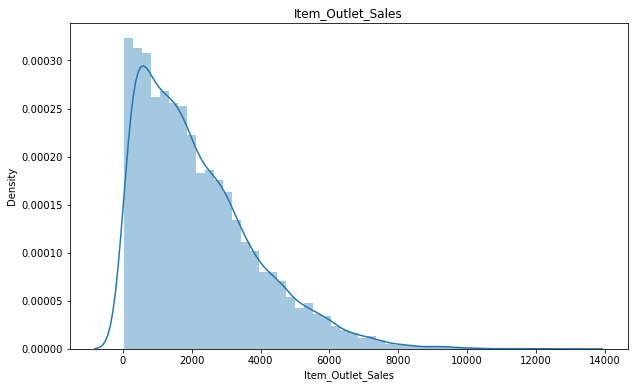

In [70]:
plt.figure(figsize = (10, 6))
sns.distplot(df['Item_Outlet_Sales'])
plt.title('Item_Outlet_Sales')

#### Sales Data is skwed towards right side.

Text(0.5, 1.0, 'Item_MRP')

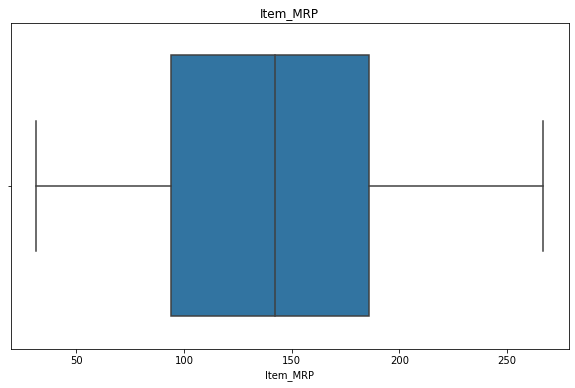

In [75]:
plt.figure(figsize = (10, 6))
sns.boxplot(df['Item_MRP'])
plt.title('Item_MRP')

#### Max MRP contain data 90 to 180.

Text(0.5, 1.0, 'Item_Visibility')

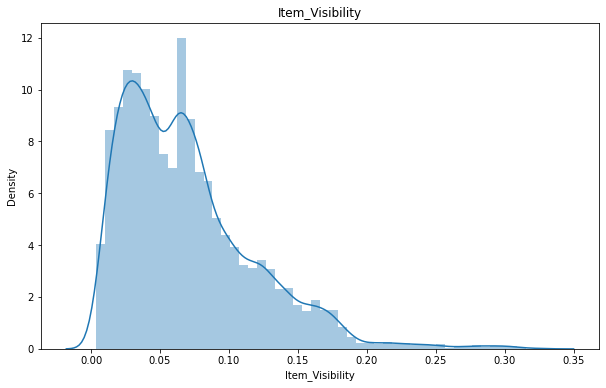

In [72]:
plt.figure(figsize = (10, 6))
sns.distplot(df['Item_Visibility'])
plt.title('Item_Visibility')

#### Visibility Data is toward right skwed.
We can infer from above graph that their are so many items which have lower visibility.

Text(0.5, 1.0, 'Item_Weight')

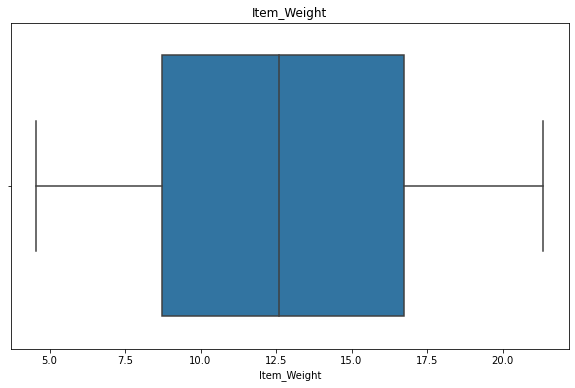

In [74]:
plt.figure(figsize = (10, 6))
sns.boxplot(df['Item_Weight'])
plt.title('Item_Weight')

#### Max weight contains 8.5 to 17

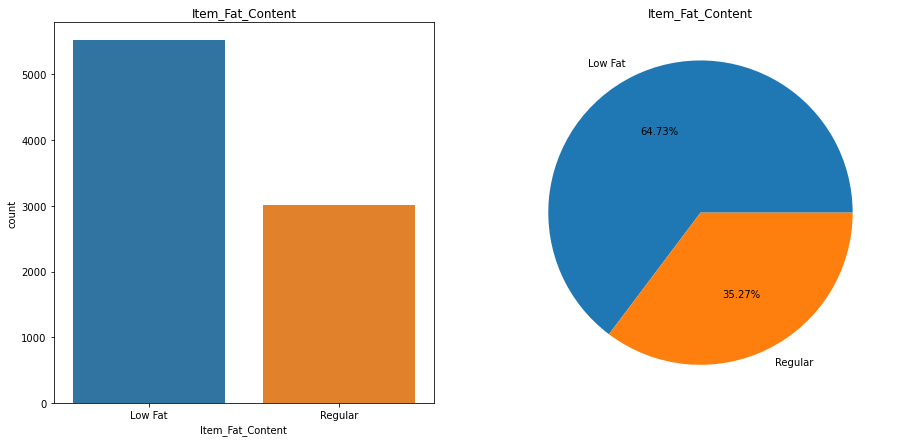

In [81]:
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].set_title("Item_Fat_Content")
ax[1].set_title("Item_Fat_Content")                  # Set the title of the graph
percentage = df3["Item_Fat_Content"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df3["Item_Fat_Content"].value_counts().index) # Converting the index of value counts into list

sns.countplot(x = df3["Item_Fat_Content"], ax = ax[0])
plt.pie(percentage,labels = labels, autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

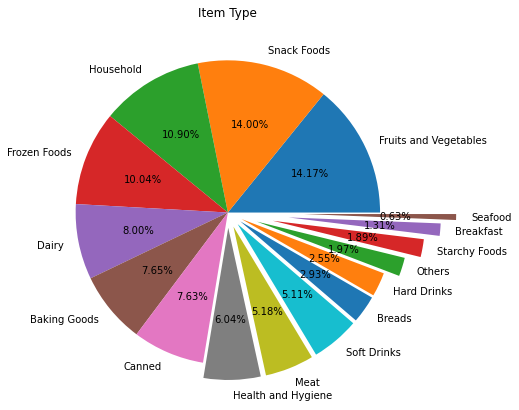

In [57]:
fig, ax = plt.subplots(figsize = (15, 7))
ax.set_title('Item Type')                  # Set the title of the graph
percentage = df["Item_Type"].value_counts()         # value_counts: returns the count of values in series: return series
labels = list(df["Item_Type"].value_counts().index) # Converting the index of value counts into list

plt.pie(percentage,labels = labels, explode=[0,0,0,0,0,0,0,0.1,0.1,0.1,0.1,0.1,0.2,0.3,0.4,0.5],autopct= "%0.2f%%")  # autopct: to print the percentage on pie wedge. 2 decimal points used 

plt.show()

In [ ]:
d=sns.catplot(data=df3,x = "Item_Type",hue='Item_Outlet_Sales',kind='bar',aspect=6)
ax = d.facet_axis(0,0)
for p in ax.patches:
    count=p.get_height().round(2)
    x=p.get_x()+p.get_width()/2
    y=p.get_height()
    ax.text(x,y,count,va='bottom',ha='center')

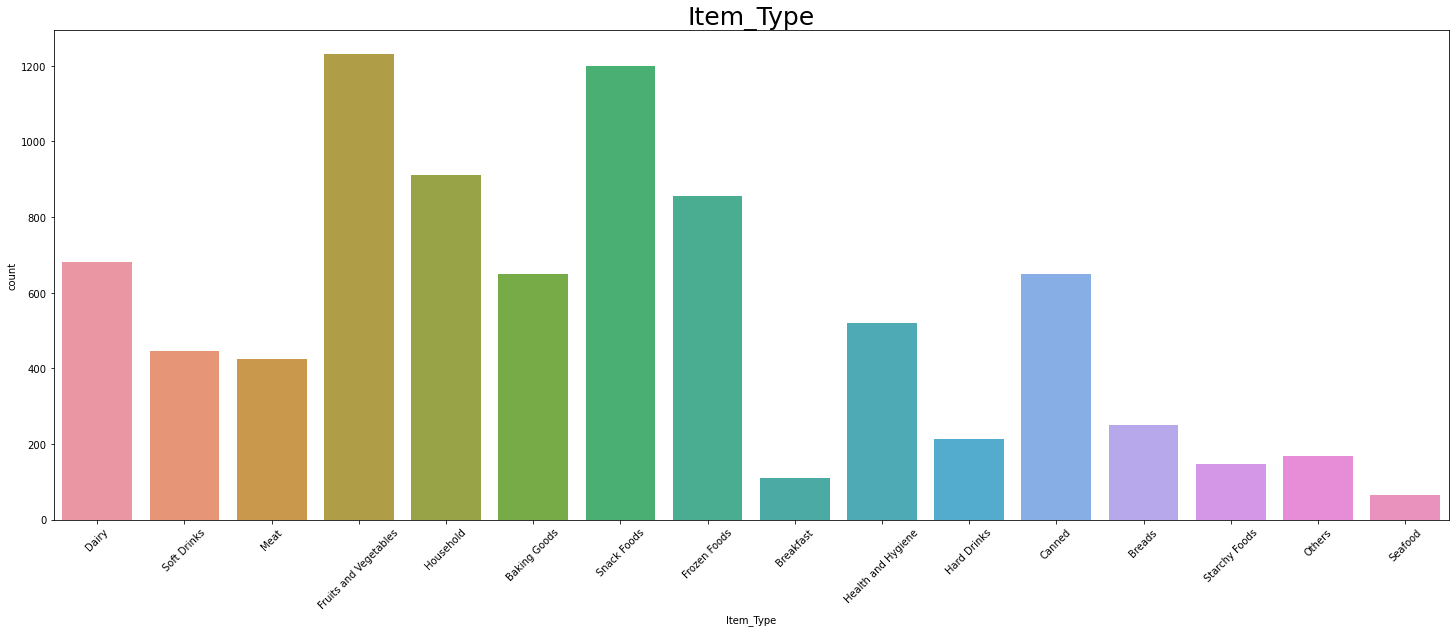

In [80]:
plt.figure(figsize=(25,9))
sns.countplot('Item_Type',data=df3)
plt.xticks(rotation = 45);

plt.title('Item_Type',fontsize=25);

#### Fruits and Vegetables and snacks food are largely sold as people tend to use them on daily purpose.

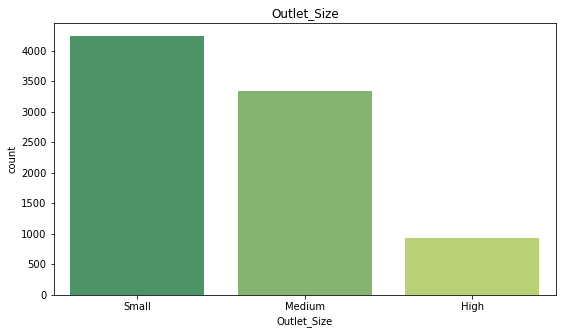

In [89]:
plt.figure(figsize=(9,5))
sns.countplot('Outlet_Size',data=df3,palette='summer',order=['Small','Medium','High'])
plt.title('Outlet_Size');

#### Small outlet size has the max mo. of count in data.

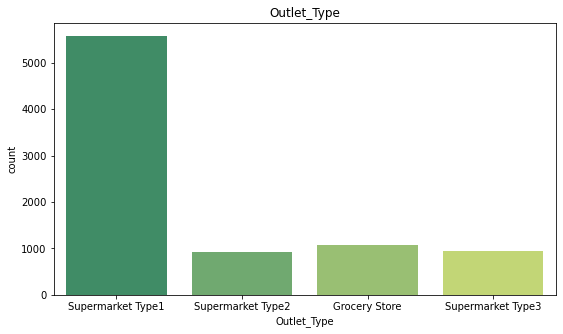

In [93]:
plt.figure(figsize=(9,5))
sns.countplot('Outlet_Type',data=df3,palette='summer',order=['Supermarket Type1','Supermarket Type2','Grocery Store','Supermarket Type3'])
plt.title('Outlet_Type');

#### Supermarket Type1 has the max count of outlets.

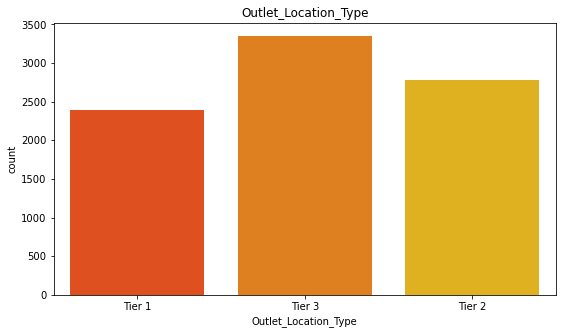

In [95]:
plt.figure(figsize=(9,5))
sns.countplot('Outlet_Location_Type',data=df3,palette='autumn')
plt.title('Outlet_Location_Type');

#### Outlet location type Tier3 has the max count of outlets.

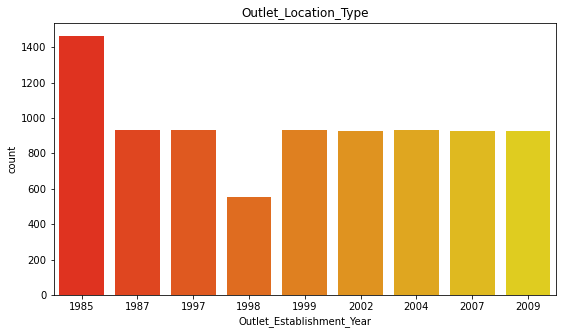

In [97]:
plt.figure(figsize=(9,5))
sns.countplot('Outlet_Establishment_Year',data=df3,palette='autumn')
plt.title('Outlet_Location_Type');

## Bivariate analysis

<Figure size 2160x504 with 0 Axes>

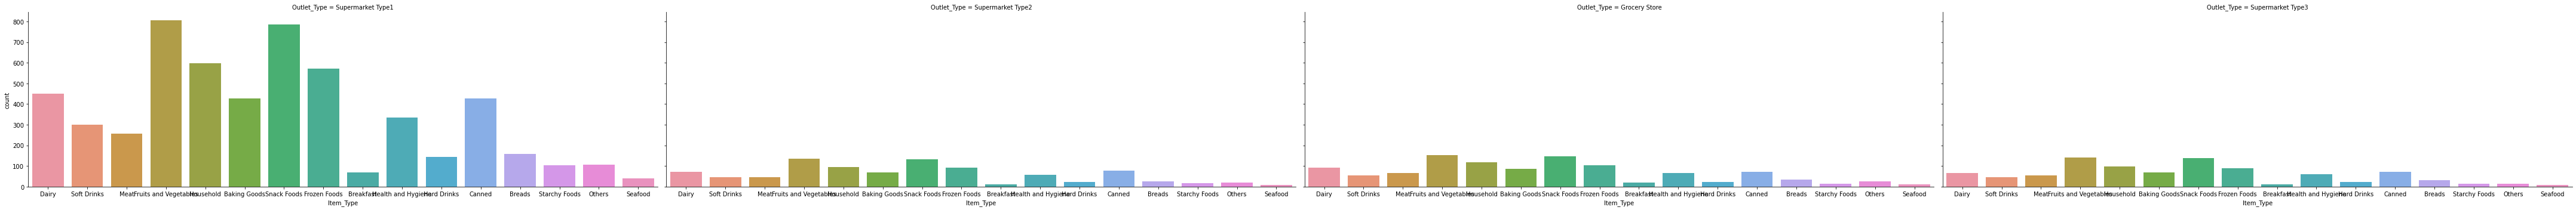

In [98]:
plt.figure(figsize= (30, 7))
sns.catplot(data=df3,x="Item_Type",col='Outlet_Type',kind='count',aspect=3,);

<Figure size 2160x504 with 0 Axes>

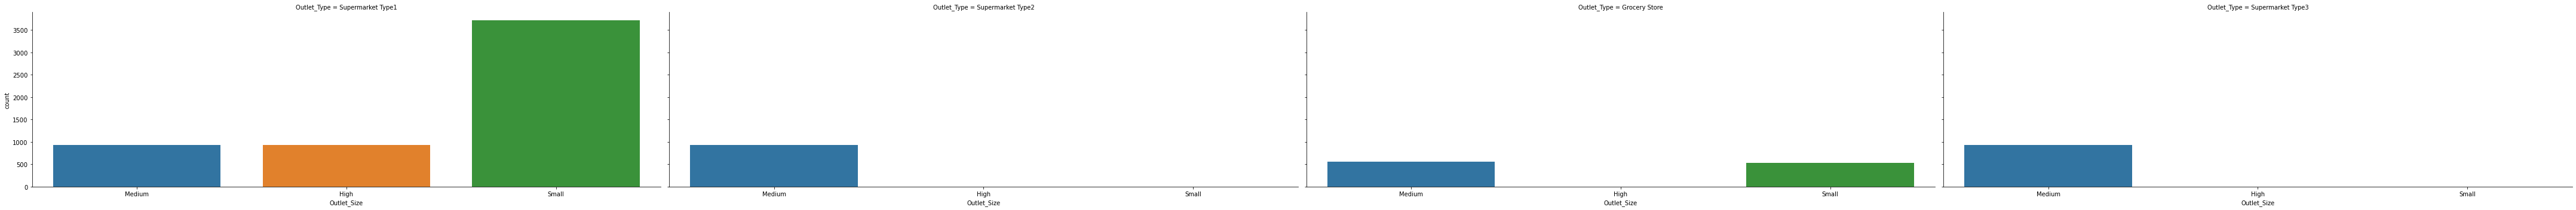

In [99]:
plt.figure(figsize= (30, 7))
sns.catplot(data=df3,x="Outlet_Size",col='Outlet_Type',kind='count',aspect=3,);

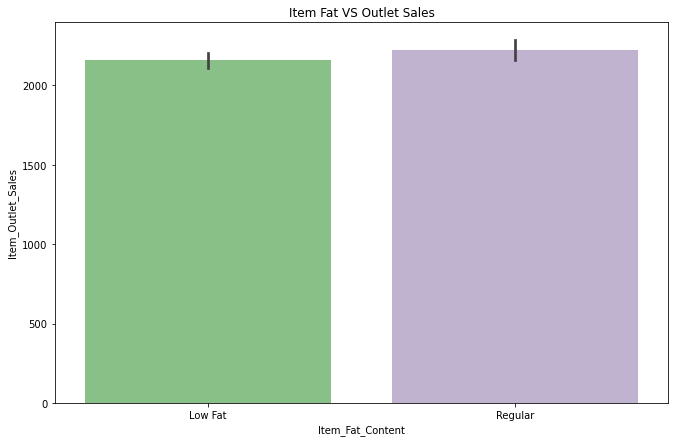

In [108]:
plt.figure(figsize=(11,7))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=df3,palette='Accent');
plt.title('Item Fat VS Outlet Sales');

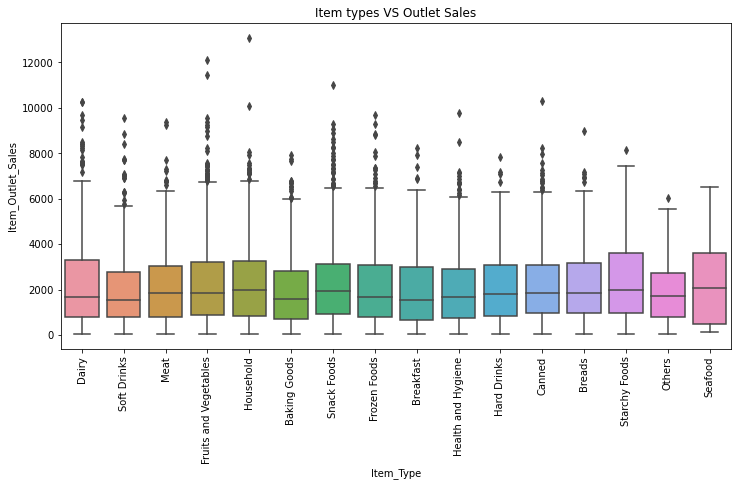

In [115]:
plt.figure(figsize=(12,6))
sns.boxplot('Item_Type','Item_Outlet_Sales',data=df3);
plt.xticks(rotation = 90);

plt.title('Item types VS Outlet Sales');

<Figure size 576x360 with 0 Axes>

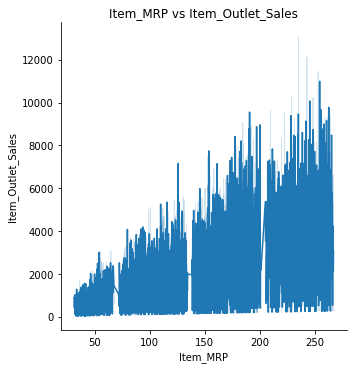

In [116]:
plt.figure(figsize=(8,5))
sns.relplot(data=df3,x='Item_MRP',y='Item_Outlet_Sales',kind='line');
plt.title('Item_MRP vs Item_Outlet_Sales');

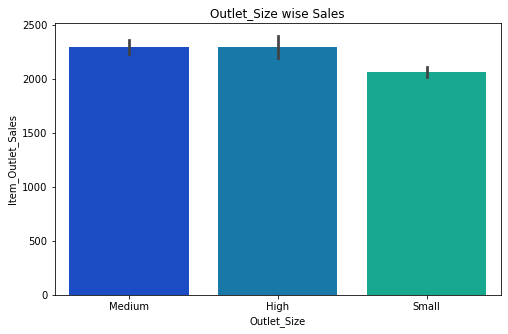

In [117]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df3,palette='winter');
plt.title('Outlet_Size wise Sales');

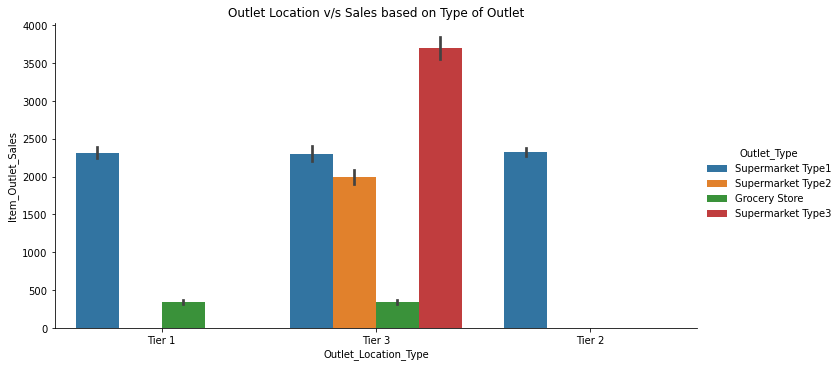

In [118]:
sns.catplot(data=df3,x='Outlet_Location_Type',y='Item_Outlet_Sales',kind='bar',aspect=2,hue='Outlet_Type')
plt.title('Outlet Location v/s Sales based on Type of Outlet')
plt.show()

In [ ]:
# Outlet Location ,Size v/s Sales 

In [119]:
size_data=df3.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()
df_size=pd.DataFrame(size_data)

In [120]:
df_size.reset_index(inplace=True)

In [121]:
df_size

,Outlet_Size,Item_Outlet_Sales
0,High,2.142664e+06
1,Medium,7.678059e+06
2,Small,8.770403e+06


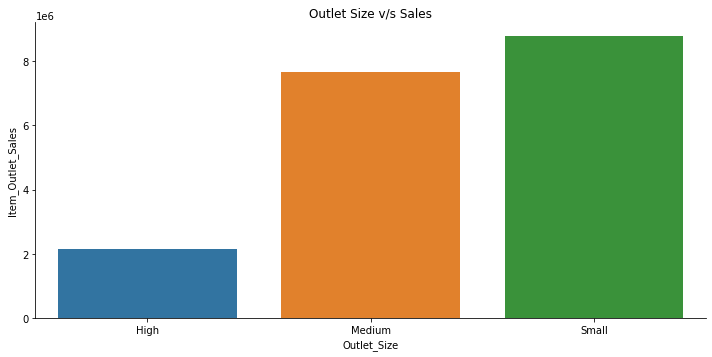

In [122]:
sns.catplot(data=df_size,x='Outlet_Size',y='Item_Outlet_Sales',kind='bar',aspect=2)
plt.title('Outlet Size v/s Sales')
plt.show()

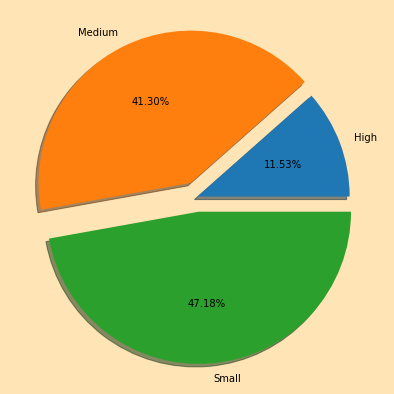

In [142]:
plt.figure(figsize=(13,7),facecolor='moccasin')
plt.pie(labels=df_size.Outlet_Size,x=df_size.Item_Outlet_Sales,autopct='%0.2f%%',shadow=True,explode=[0,0.1,0.1])
plt.show()

#### Small outlets are the max.

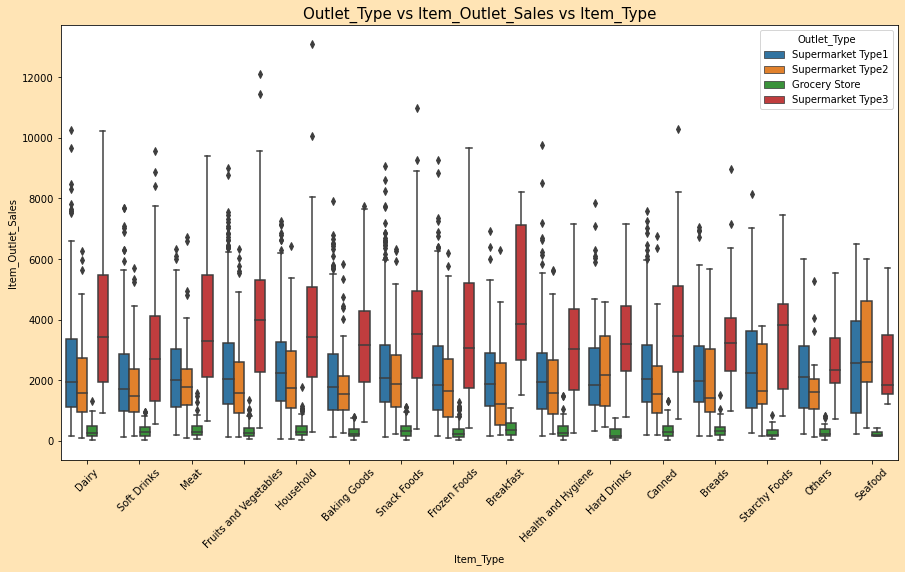

In [141]:
plt.figure(figsize=(15,8),facecolor='moccasin')
sns.boxplot('Item_Type', 'Item_Outlet_Sales', data=df3, hue='Outlet_Type');
plt.xticks(rotation = 45);
plt.title('Outlet_Type vs Item_Outlet_Sales vs Item_Type',fontsize=15);

#### Fruits and Vegetables and snacks food are largely sold as people tend to use them on daily purpose.

<Figure size 576x432 with 0 Axes>

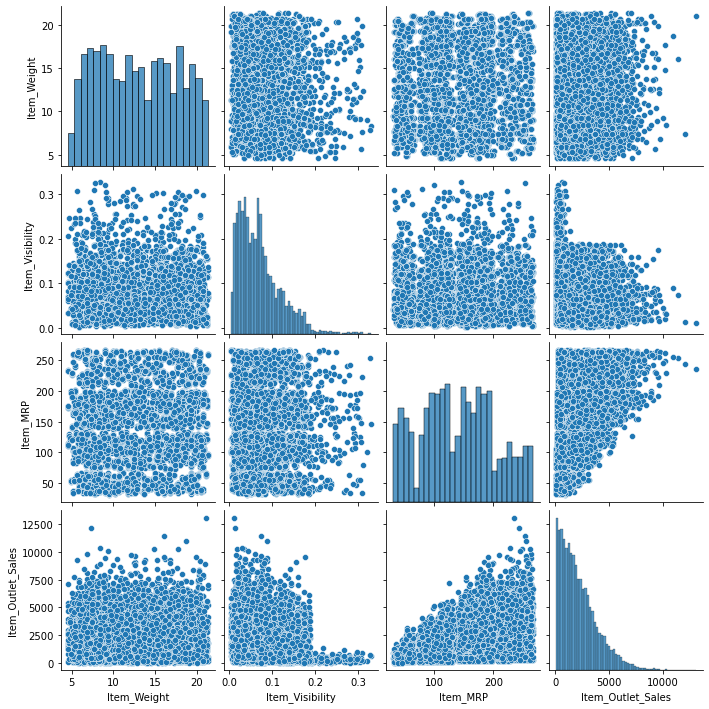

In [137]:
plt.figure(figsize=(8,6))
sns.pairplot(df3)

In [138]:
corr_df=df3.corr()
corr_df['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales    1.000000
Item_MRP             0.567574
Item_Weight          0.013261
Item_Visibility     -0.135247
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

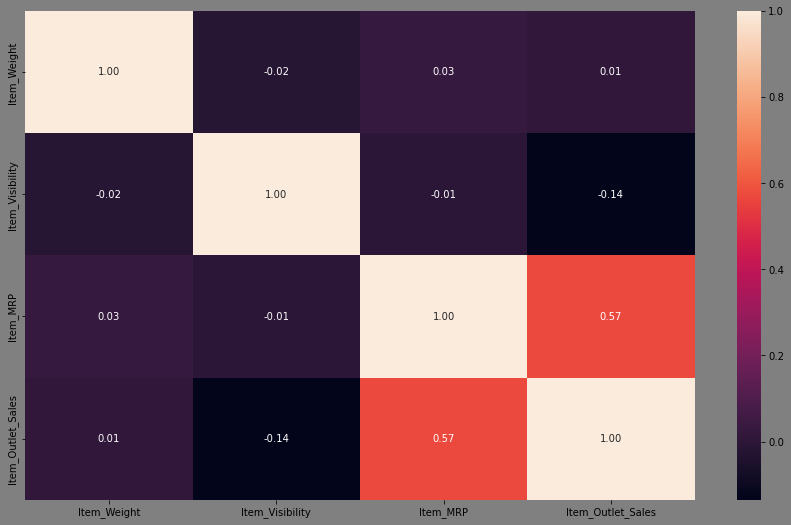

In [139]:
plt.figure(figsize=(15,9),facecolor='Gray')
sns.heatmap(corr_df,annot=True,fmt='.2f')

#### There is no significant correlation except Item_MRP and Item_Outlet_Sales as the MRP of items increases the sales is also increasing

# PreProcessing

In [167]:
df3.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

In [168]:
df3.dtypes

Item_Identifier          object
Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
dtype: object

In [169]:
c=['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i in c:
    df3[i]=df3[i].astype('category')
df3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Item_Identifier       8523 non-null   category
 1   Item_Weight           8523 non-null   float64 
 2   Item_Fat_Content      8523 non-null   category
 3   Item_Visibility       8523 non-null   float64 
 4   Item_Type             8523 non-null   category
 5   Item_MRP              8523 non-null   float64 
 6   Outlet_Identifier     8523 non-null   category
 7   Outlet_Size           8523 non-null   category
 8   Outlet_Location_Type  8523 non-null   category
 9   Outlet_Type           8523 non-null   category
 10  Item_Outlet_Sales     8523 non-null   float64 
dtypes: category(7), float64(4)
memory usage: 445.6 KB


#### Encoding Categorical Variables
Label Encoding and One Hot Encoding.

Label encoding simply means converting each category in a variable to a number.

In One hot encoding, each category of a categorical variable is converted into a new binary column (0/1).

In [171]:
label_encoder = preprocessing.LabelEncoder()
for i in c:
    df3[i]=label_encoder.fit_transform(df3[i])

In [174]:
lst=['Item_Identifier','Item_Weight','Item_Type','Item_MRP','Item_Outlet_Sales']
scale=MinMaxScaler()
df3[lst]=scale.fit_transform(df3[lst])

In [176]:
df3

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0,0.016047,0.266667,0.927507,9,1,0,1,0.283587
1,0.005135,0.081274,1,0.019278,0.933333,0.072068,3,1,2,2,0.031419
2,0.424904,0.770765,0,0.016760,0.666667,0.468288,9,1,0,1,0.158115
3,0.719512,0.871986,1,0.074402,0.400000,0.640093,0,1,2,0,0.053555
4,0.832478,0.260494,0,0.064299,0.600000,0.095805,1,0,2,1,0.073651
...,...,...,...,...,...,...,...,...,...,...,...
8518,0.237484,0.137541,0,0.056783,0.866667,0.777729,1,0,2,1,0.210293
8519,0.575738,0.227746,1,0.046982,0.000000,0.326263,7,2,1,1,0.039529
8520,0.870988,0.359929,0,0.035186,0.533333,0.228492,6,2,1,1,0.088850
8521,0.437099,0.158083,1,0.145221,0.866667,0.304939,3,1,2,2,0.138835


<AxesSubplot:>

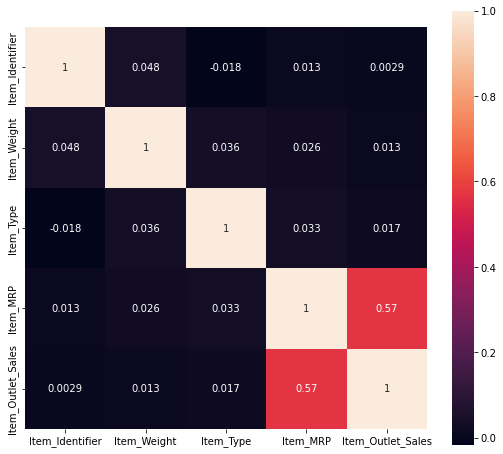

In [179]:
plt.figure(figsize=(9, 8))
sns.heatmap(df3[['Item_Identifier','Item_Weight','Item_Type','Item_MRP','Item_Outlet_Sales']].corr(), annot=True, square=True)

## Data Spliting

In [182]:
X=np.array(df3.loc[:,df3.columns !='Item_Outlet_Sales']).reshape((-1, 10))
y=np.array(df3['Item_Outlet_Sales']).reshape(-1,1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Model Building

In [222]:
r2=[];rmse=[];names=[];cv=[]

In [223]:
lr = LinearRegression().fit(X_train, y_train)
scorelr=lr.score(X_train, y_train)
y_pred_lr = lr.predict(X_test)
MSElr=mean_squared_error(y_test, y_pred_lr).round(4)
RMSElr=np.sqrt(mean_squared_error(y_test, y_pred_lr)).round(4)
scorelrt=lr.score(X_test, y_test).round(4)*100
r2.append(scorelrt)
rmse.append(RMSElr)
names.append('Linear Regression')
print('Rscore:',scorelrt)
print('MSE:',MSElr)
print('RMSE:',RMSElr)

Rscore: 50.73
MSE: 0.0081
RMSE: 0.09


## Using Crossvalidation

In [224]:
kf = KFold(n_splits=5,shuffle=True,random_state=42)
cvlr=cross_val_score(LinearRegression(), X, y, cv= kf, scoring="r2").mean().round(4)*100
cv.append(cvlr)

# DecisionTree

In [225]:
dtm = DecisionTreeRegressor(max_depth=5,min_samples_split=5,max_leaf_nodes=10)

dtm1=dtm.fit(X_train,y_train)
scoredtr=dtm1.score(X_train,y_train).round(4)*100
scoredt=dtm1.score(X_test,y_test).round(4)*100

print("R-Squared: ",scoredt)
y_pred_dt=dtm1.predict(X_test)
msedt=mean_squared_error(y_test,y_pred_dt).round(4)
rmsedt=np.sqrt(mean_squared_error(y_test,y_pred_dt)).round(4)
print('MSE:',msedt)
print('RMSE:',rmsedt)
r2.append(scoredt)
rmse.append(rmsedt)
names.append('Decision Tree Regression')

R-Squared:  58.24
MSE: 0.0069
RMSE: 0.0829


In [226]:
from sklearn import  tree

max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmsecv = np.sqrt(-score)
    print('RMSE:',round(rmsecv.mean(),2))

For max depth: 1
RMSE: 0.11
For max depth: 2
RMSE: 0.1
For max depth: 3
RMSE: 0.09
For max depth: 4
RMSE: 0.08
For max depth: 5
RMSE: 0.08
For max depth: 6
RMSE: 0.08
For max depth: 7
RMSE: 0.09
For max depth: 8
RMSE: 0.09
For max depth: 9
RMSE: 0.09
For max depth: 10
RMSE: 0.09


In [227]:
#cross-validate
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), X, y, cv= kf, scoring='r2')
    print(f'For max depth: {val}')
    print('Score: ',score.mean().round(5)*100)
    #rmse = np.sqrt(-score)
    #print('RMSE:',round(rmse.mean(),2))


For max depth: 1
Score:  23.334
For max depth: 2
Score:  43.038
For max depth: 3
Score:  52.205999999999996
For max depth: 4
Score:  57.769000000000005
For max depth: 5
Score:  59.111999999999995
For max depth: 6
Score:  58.23700000000001
For max depth: 7
Score:  57.093
For max depth: 8
Score:  55.93
For max depth: 9
Score:  53.452999999999996
For max depth: 10
Score:  50.849999999999994
For max depth: 11
Score:  47.565000000000005
For max depth: 12
Score:  44.185
For max depth: 13
Score:  40.42
For max depth: 14
Score:  37.043
For max depth: 15
Score:  34.971000000000004


In [228]:
cvdt=cross_val_score(tree.DecisionTreeRegressor(max_depth=5, random_state= 42), X, y, cv= kf, scoring="r2").mean().round(6)*100
cv.append(cvdt)

# Random Forest Regressor(bagging)

In [229]:
model = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True).fit(X_train, y_train)
scorer=model.score(X_train,y_train).round(3)*100
y_predr=model.predict(X_test)
MSER=mean_squared_error(y_test,y_predr)
RMSER=np.sqrt(mean_squared_error(y_test,y_predr)).round(4)
print('R-square:',scorer)

print('MSE:',MSER)
print('RMSE:',RMSER)

R-square: 61.199999999999996
MSE: 0.006531199212507417
RMSE: 0.0808


In [230]:
r2.append(scorer)
rmse.append(RMSER)
names.append('Random Forest Regression')

In [231]:
#cross-validate
max_depth = [1,2,3,4,5,6,7,8]
for val in max_depth:
    score = cross_val_score(RandomForestRegressor(max_depth= val, random_state= 42), X, y, cv= kf, scoring="r2")
    print(f'For max depth: {val}')
    print('score: ',score.mean().round(4)*100)

For max depth: 1
score:  24.62
For max depth: 2
score:  45.51
For max depth: 3
score:  53.959999999999994
For max depth: 4
score:  58.919999999999995
For max depth: 5
score:  59.74
For max depth: 6
score:  59.77
For max depth: 7
score:  59.699999999999996
For max depth: 8
score:  59.57


In [232]:
cvrf=cross_val_score(RandomForestRegressor(max_depth=6, random_state= 42), X, y, cv= kf, scoring="r2").mean().round(2)*100
cv.append(cvrf)

## hyperparameter tunning (grid search)

In [233]:
params = {
    'max_depth': [2,5,7,9],
    'min_samples_leaf': [5,20,50,100],
    'n_estimators': [10,30,50,100]
}

In [234]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model,param_grid=params,cv = 4,n_jobs=-1, verbose=1, scoring="r2")

In [235]:
%%time
grid_search.fit(X_train, y_train);

Fitting 4 folds for each of 64 candidates, totalling 256 fits
CPU times: total: 969 ms
Wall time: 21.4 s


GridSearchCV(cv=4,
             estimator=RandomForestRegressor(max_depth=5, n_jobs=-1,
                                             oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 7, 9],
                         'min_samples_leaf': [5, 20, 50, 100],
                         'n_estimators': [10, 30, 50, 100]},
             scoring='r2', verbose=1)

In [236]:
grid_search.best_estimator_

RandomForestRegressor(max_depth=5, min_samples_leaf=20, n_estimators=30,
                      n_jobs=-1, oob_score=True, random_state=42)

In [237]:
y_predt=grid_search.predict(X_test)
y_predt

array([0.09345457, 0.05141824, 0.05141824, ..., 0.03528567, 0.15636112,
       0.30246066])

In [238]:
gridr2=grid_search.best_score_.round(5)*100
gridr2

59.528999999999996

In [239]:
rmsegrid=np.sqrt(mean_squared_error(y_test,y_predt))
rmsegrid

0.0810718453930238

# AdaBoostRegressor(Boosting)

In [240]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor(random_state=42).fit(X_train, y_train)
scoreab=model.score(X_test,y_test).round(3)*100
y_predab=model.predict(X_test)
RMSEAB=np.sqrt(mean_squared_error(y_test,y_predab)).round(4)
print(scoreab)
print(RMSEAB)
# evaluate the model
r2.append(scoreab)
rmse.append(RMSEAB)
names.append('AdaBoostRegressor')

# report performance
#print('score: ',n_scores.mean().round(4)*100)
#print('score: ',rmseada.mean().round(4))

32.5
0.1054


In [241]:
cvab= cross_val_score(model, X,y, scoring='r2', n_jobs=-1,cv=kf,error_score='raise').mean().round(2)*100
cv.append(cvab)

# Stacking

In [242]:
def get_stacking():
    level0 = list()
    level0.append(('lr', LinearRegression()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('rfr', RandomForestRegressor()))
    level0.append(('abr', AdaBoostRegressor()))

    # define meta learner model
    level1 = LinearRegression().fit(X_train,y_train)
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [243]:
model = get_stacking()

n_scores = cross_val_score(model, X_test,y_test, scoring='r2', cv=kf, n_jobs=-1, error_score='raise')
#rmsest = cross_val_score(model, X_test,y_test, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1, error_score='raise')

# report performance
print('Score: %.3f' % (n_scores.mean()*100))


Score: 56.278


In [244]:
final_rmse=pd.DataFrame(list(zip(names,rmse)),columns=['Algorithm','RMSE']).set_index('Algorithm').sort_values(by='RMSE',ascending=False)
final_r2=pd.DataFrame(list(zip(names,r2)),columns=['Algorithm','R2']).set_index('Algorithm').sort_values(by='R2',ascending=False)
final_cv=pd.DataFrame(list(zip(names,cv)),columns=['Algorithm','Cross_Validation']).set_index('Algorithm').sort_values(by='Cross_Validation',ascending=False)

In [247]:
final_r2

,R2
Algorithm,
Random Forest Regression,61.20
Decision Tree Regression,58.24
Linear Regression,50.73
AdaBoostRegressor,32.50


In [248]:
final_rmse

,RMSE
Algorithm,
AdaBoostRegressor,0.1054
Linear Regression,0.0900
Decision Tree Regression,0.0829
Random Forest Regression,0.0808


In [249]:
final_cv

,Cross_Validation
Algorithm,
Random Forest Regression,60.0000
Decision Tree Regression,59.1123
Linear Regression,50.0300
AdaBoostRegressor,44.0000


In [281]:
final=pd.concat([final_r2,final_cv,final_rmse],axis=1)
final

,R2,Cross_Validation,RMSE
Algorithm,,,
Random Forest Regression,61.20,60.0000,0.0808
Decision Tree Regression,58.24,59.1123,0.0829
Linear Regression,50.73,50.0300,0.0900
AdaBoostRegressor,32.50,44.0000,0.1054


In [282]:
pred=pd.DataFrame({'actual':y_test.flatten(),'Predicted':y_predr.flatten()})

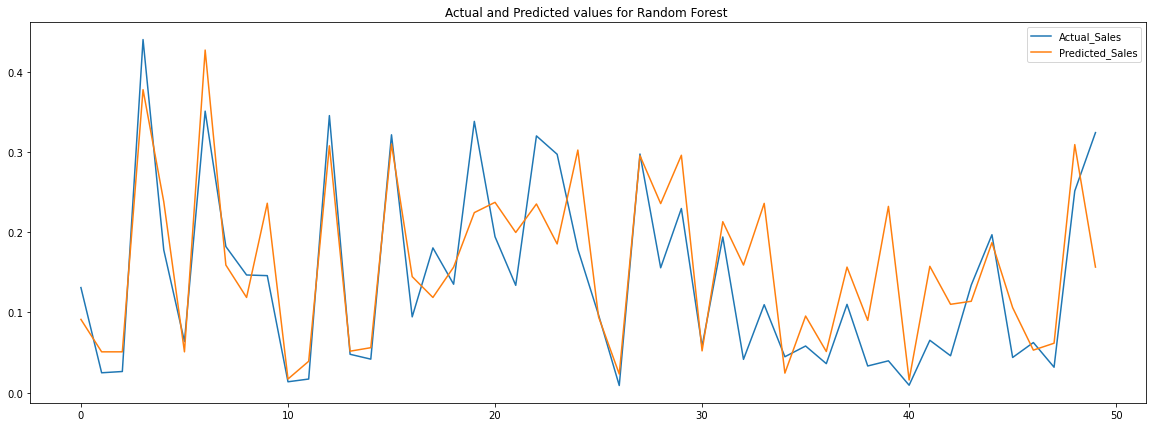

In [290]:

plt.figure(figsize=(20,7))
plt.title('Actual and Predicted values for Random Forest ')
plt.plot(pred.actual[:50],label='Actual_Sales')
plt.plot(pred.Predicted[:50],label='Predicted_Sales')
plt.legend()
plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

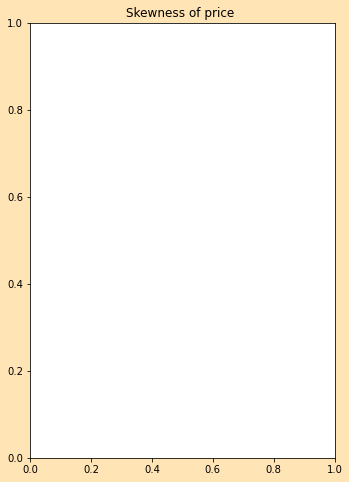

In [272]:
plt.figure(figsize=(12,8),facecolor='moccasin')
plt.subplot(121)
plt.title('Skewness of price ')
plt.bar(x=final_r2['R2']);
plt.subplot(122)
plt.title('Skewness of price ')
plt.bar(x=final_rmse['RMSE']);

TypeError: bar() missing 1 required positional argument: 'height'

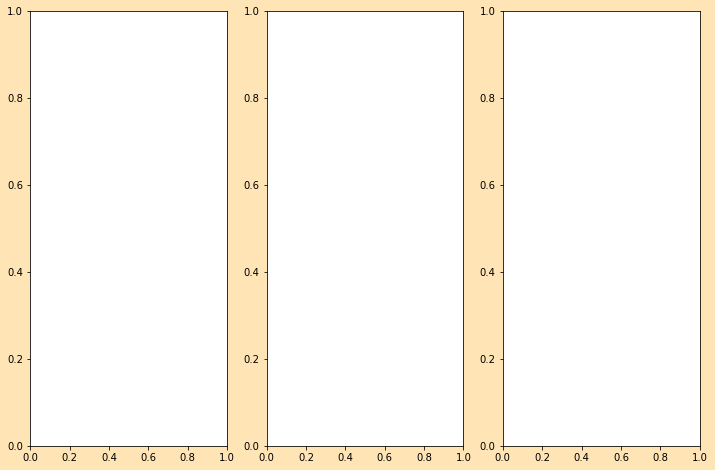

In [270]:
plt.subplots(1,3,figsize=(12,8),facecolor='moccasin')

plt.subplot(131)
plt.bar(final_r2,)
#plt.xticks(rotation = 20);
plt.title('Performance(R2)');

plt.subplot(132)
final_rmse.plot(kind='bar')
#plt.xticks(rotation = 20);
plt.title('Performance(R2)');

plt.subplot(133)
final_cv.plot(kind='bar')
#plt.xticks(rotation = 20);
plt.title('Performance(R2)');



<AxesSubplot:xlabel='Algorithm'>

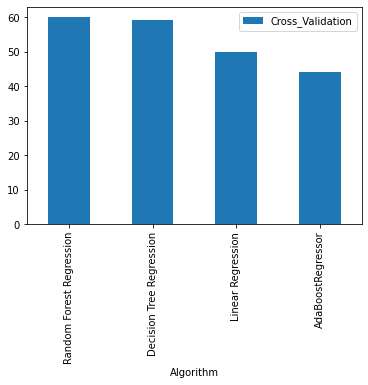

In [277]:
final_cv.plot.bar()

In [292]:
final

,R2,Cross_Validation,RMSE
Algorithm,,,
Random Forest Regression,61.20,60.0000,0.0808
Decision Tree Regression,58.24,59.1123,0.0829
Linear Regression,50.73,50.0300,0.0900
AdaBoostRegressor,32.50,44.0000,0.1054


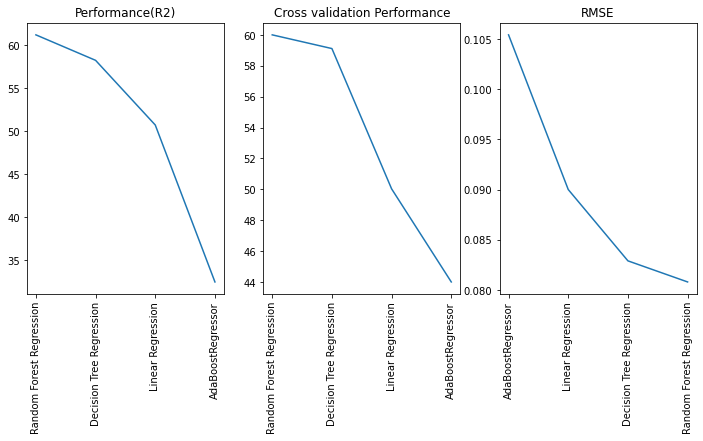

In [301]:
plt.subplots(1,3,figsize=(12,5))

plt.subplot(131)
plt.plot(final_r2)
plt.xticks(rotation = 90);
plt.title('Performance(R2)');

plt.subplot(132)
plt.plot(final_cv)
plt.xticks(rotation = 90);
plt.title('Cross validation Performance');

plt.subplot(133)
plt.plot(final_rmse)
plt.xticks(rotation = 90);
plt.title('RMSE');